<a href="https://colab.research.google.com/github/Kajal1905/Gamma-vs-Hadron-Classification/blob/main/Gamma_vs_Hadron_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [3]:
df = pd.read_csv('magic04.data')
print(df)

        28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2     

In [4]:
#Since there was no col names, lets add the names of the col.
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
#We see that the class is g or h, let's check
#But let's connect it with computer system which is 1 or 0 value
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
 df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


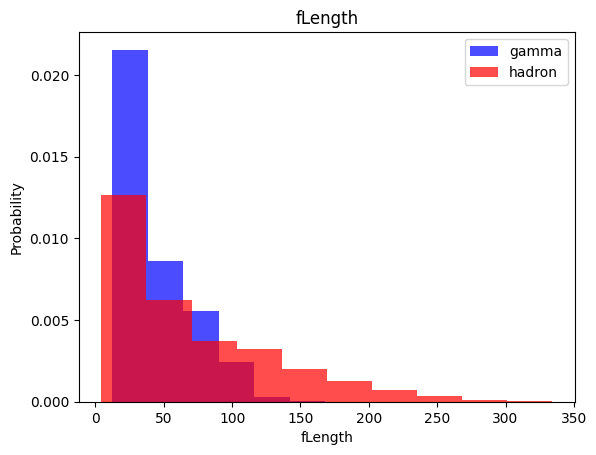

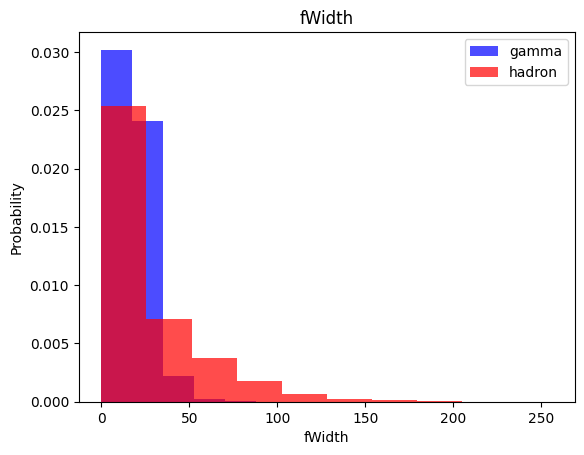

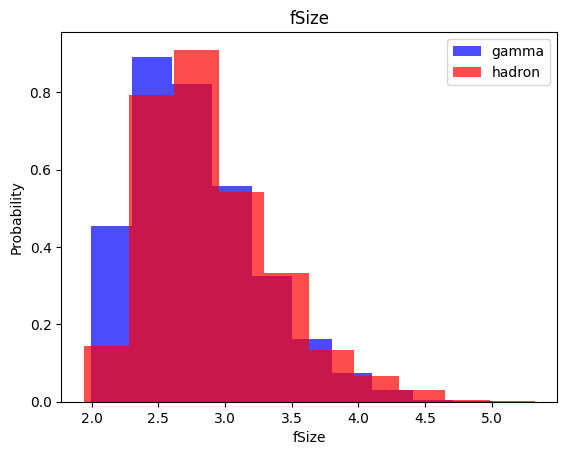

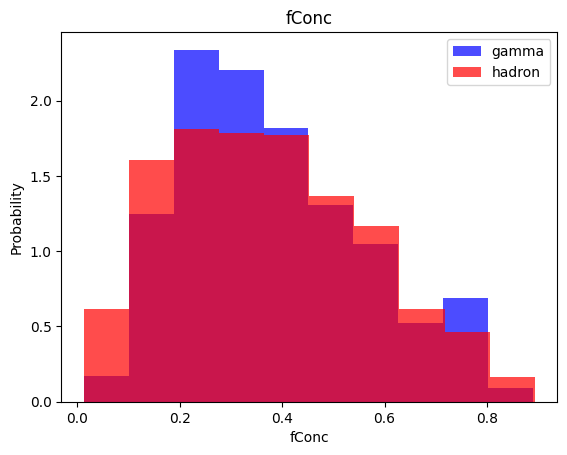

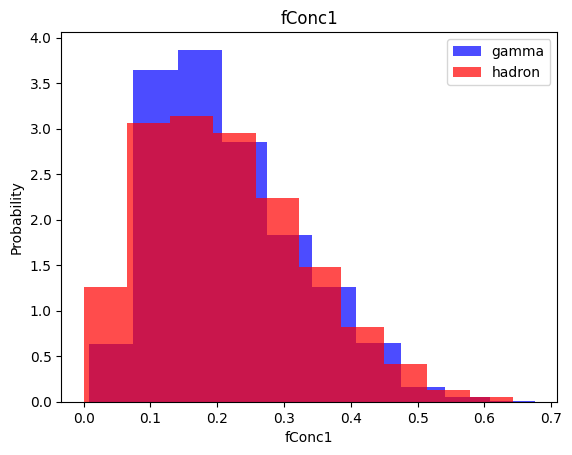

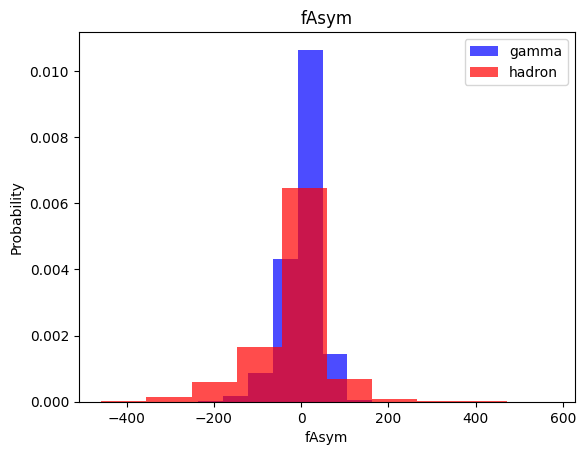

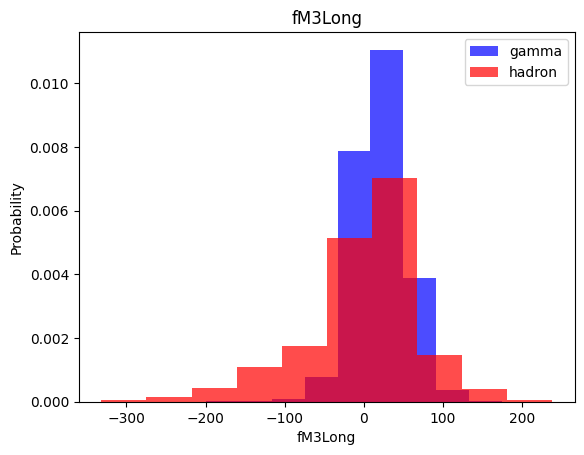

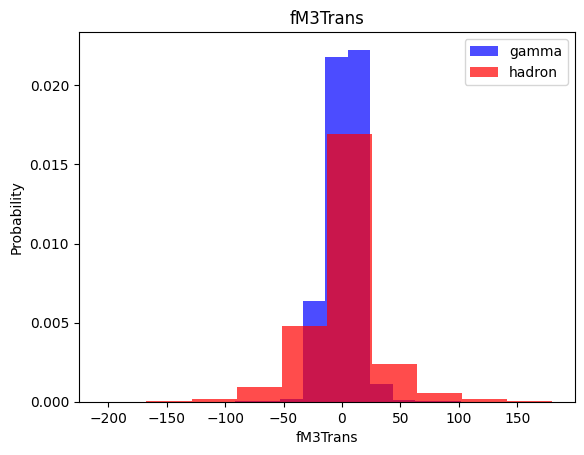

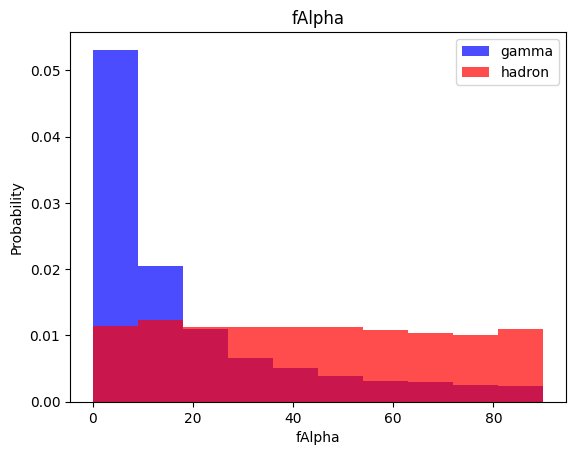

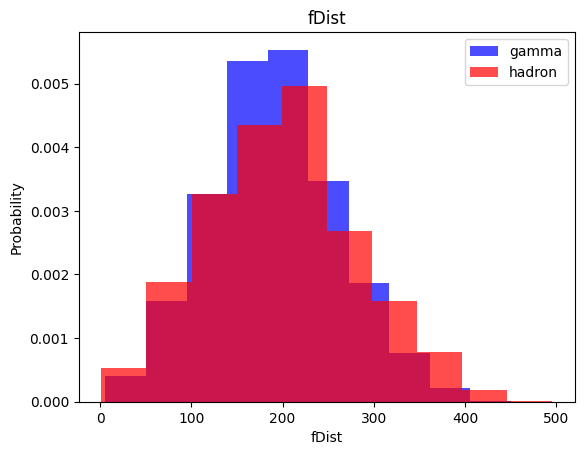

In [7]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Here we are tring to understand what kind of data are we working with.

#Train, Validation, Test Datasets

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
#Now we go up to our dataset, when we observe that the 1st 2 col have data points above 100 but nest 2 col are having data points less that 1.
#To keep the mean and SD relative. so we will be doing the following!


In [10]:
print(len(train[train['class']==1] )) #gamma
print(len(train[train['class']==0] )) #hadrons

#since the gamma's count is more than the hadrons, we shall amke it same as to make create any problems

7403
4009


In [11]:
def scale_dataset(dataframe, oversample= False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

#Fit and tranfrom 'x'
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y) # This says that, take less count of x or y then resample that untill we get the same count as the less count.

#to create an array, using hstack where it helps us to put the values side by side.
  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data, x, y



In [ ]:
#So we will oversample our training data. That measn we want to increase the number of hadrond.
#We shall now import to help us do it is from  imblearn.over_sampling import RandomOverSampler



In [12]:
#train, x_train, y_train = scale_dataset(train, oversample=True)

In [13]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#Here we will devide the data on these groups. And keep it False. note that we will not oversampleing the valid and test data
#Becasue we want to know that if we have random set of dat which is unlabled then can I trust my model, right.

In [14]:
#check

len(y_train)
sum(y_train ==1)
sum(y_train == 0 )
#now they ar eevenly balanced

np.int64(7403)

#So, so far we have properly formatted our data and now we are ready to use to models.  

#1st model we will eb learning and doing is K-nearest neighbors (kNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#getting all the prediction

y_pred = knn_model.predict(x_test)

In [18]:
y_pred


array([1, 0, 1, ..., 1, 1, 0])

In [19]:
y_test

array([1, 1, 1, ..., 1, 1, 0])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1370
           1       0.85      0.85      0.85      2434

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [61]:
#getting all the prediction

y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1370
           1       0.73      0.89      0.80      2434

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



#Logistic Regression


In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [64]:
#getting all the prediction

y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1370
           1       0.84      0.82      0.83      2434

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



#Support vector Machines (SVM)

In [65]:
from sklearn.svm import SVC

In [66]:
svm_model = SVC()
snm_model = svm_model.fit(x_train, y_train)

In [67]:
#getting all the prediction

y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1370
           1       0.89      0.90      0.90      2434

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Net

In [68]:
import tensorflow as tf

In [69]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4)  )
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


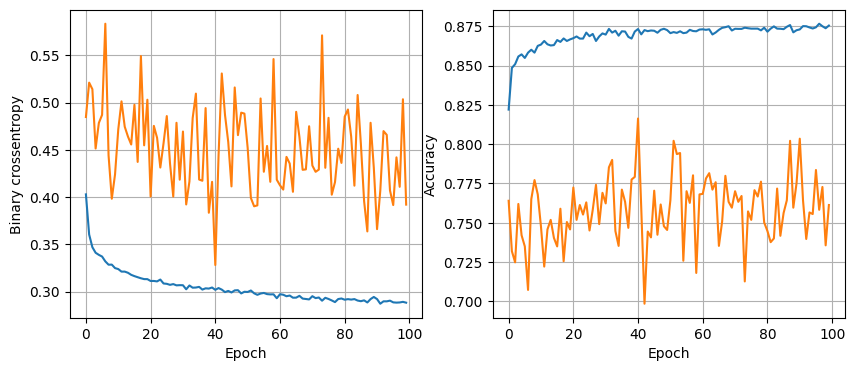

In [70]:
plot_history(history)

In [71]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0
  )
  return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model,  history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs )
        plot_history(history)
        val_loss, val_acc  = model.evaluate(x_valid, y_valid,  verbose=0)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [75]:
least_loss_model.predict(x_test )

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.9979866 ],
       [0.62354785],
       [0.6100157 ],
       ...,
       [0.9803763 ],
       [0.9685475 ],
       [0.2015782 ]], dtype=float32)

In [79]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [78]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1370
           1       0.87      0.95      0.91      2434

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

